В таблице ниже представлены еженедельные данные сканирования розничной торговли за 2018 год для Национального розничного объема (единиц) и цены. Данные сканирования розничной торговли поступают непосредственно из кассовых аппаратов розничных торговцев, основанных на фактических розничных продажах авокадо Hass. Начиная с 2013 года, приведенная ниже таблица отражает расширенный набор розничных данных по нескольким торговым точкам. Средняя цена (авокадо) в таблице отражает стоимость за единицу (за авокадо), даже если несколько единиц (авокадо) продаются в мешках. Коды поиска продуктов (PLU) в таблице предназначены только для авокадо Hass. Другие сорта авокадо (например, зеленокожие) в эту таблицу не включены.

Некоторые релевантные столбцы в наборе данных:


Date-дата наблюдения

AveragePrice - средняя цена одного авокадо

type-обычный или органический

year -это год

Region -город или регион наблюдения

Total Volume-общее количество проданных авокадо

4046 - общее количество проданных авокадо с PLU 4046

4225-общее количество проданных авокадо с PLU 4225

4770-общее количество проданных авокадо с PLU 4770


Данные и кейс данных взят отсюда: https://www.kaggle.com/neuromusic/avocado-prices

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [57]:
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Для начала немного отредактируем даннные

In [58]:
data=df.drop(["Unnamed: 0"], axis = 1)

In [59]:
data['Date'] = pd.to_datetime(data['Date'])

In [60]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [61]:
data.shape

(18249, 13)

Изучим структуру данных, а именно количество строк и столбцов, есть ли незаполненныые ячейки, какой тип данных

In [62]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [63]:
data.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [64]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


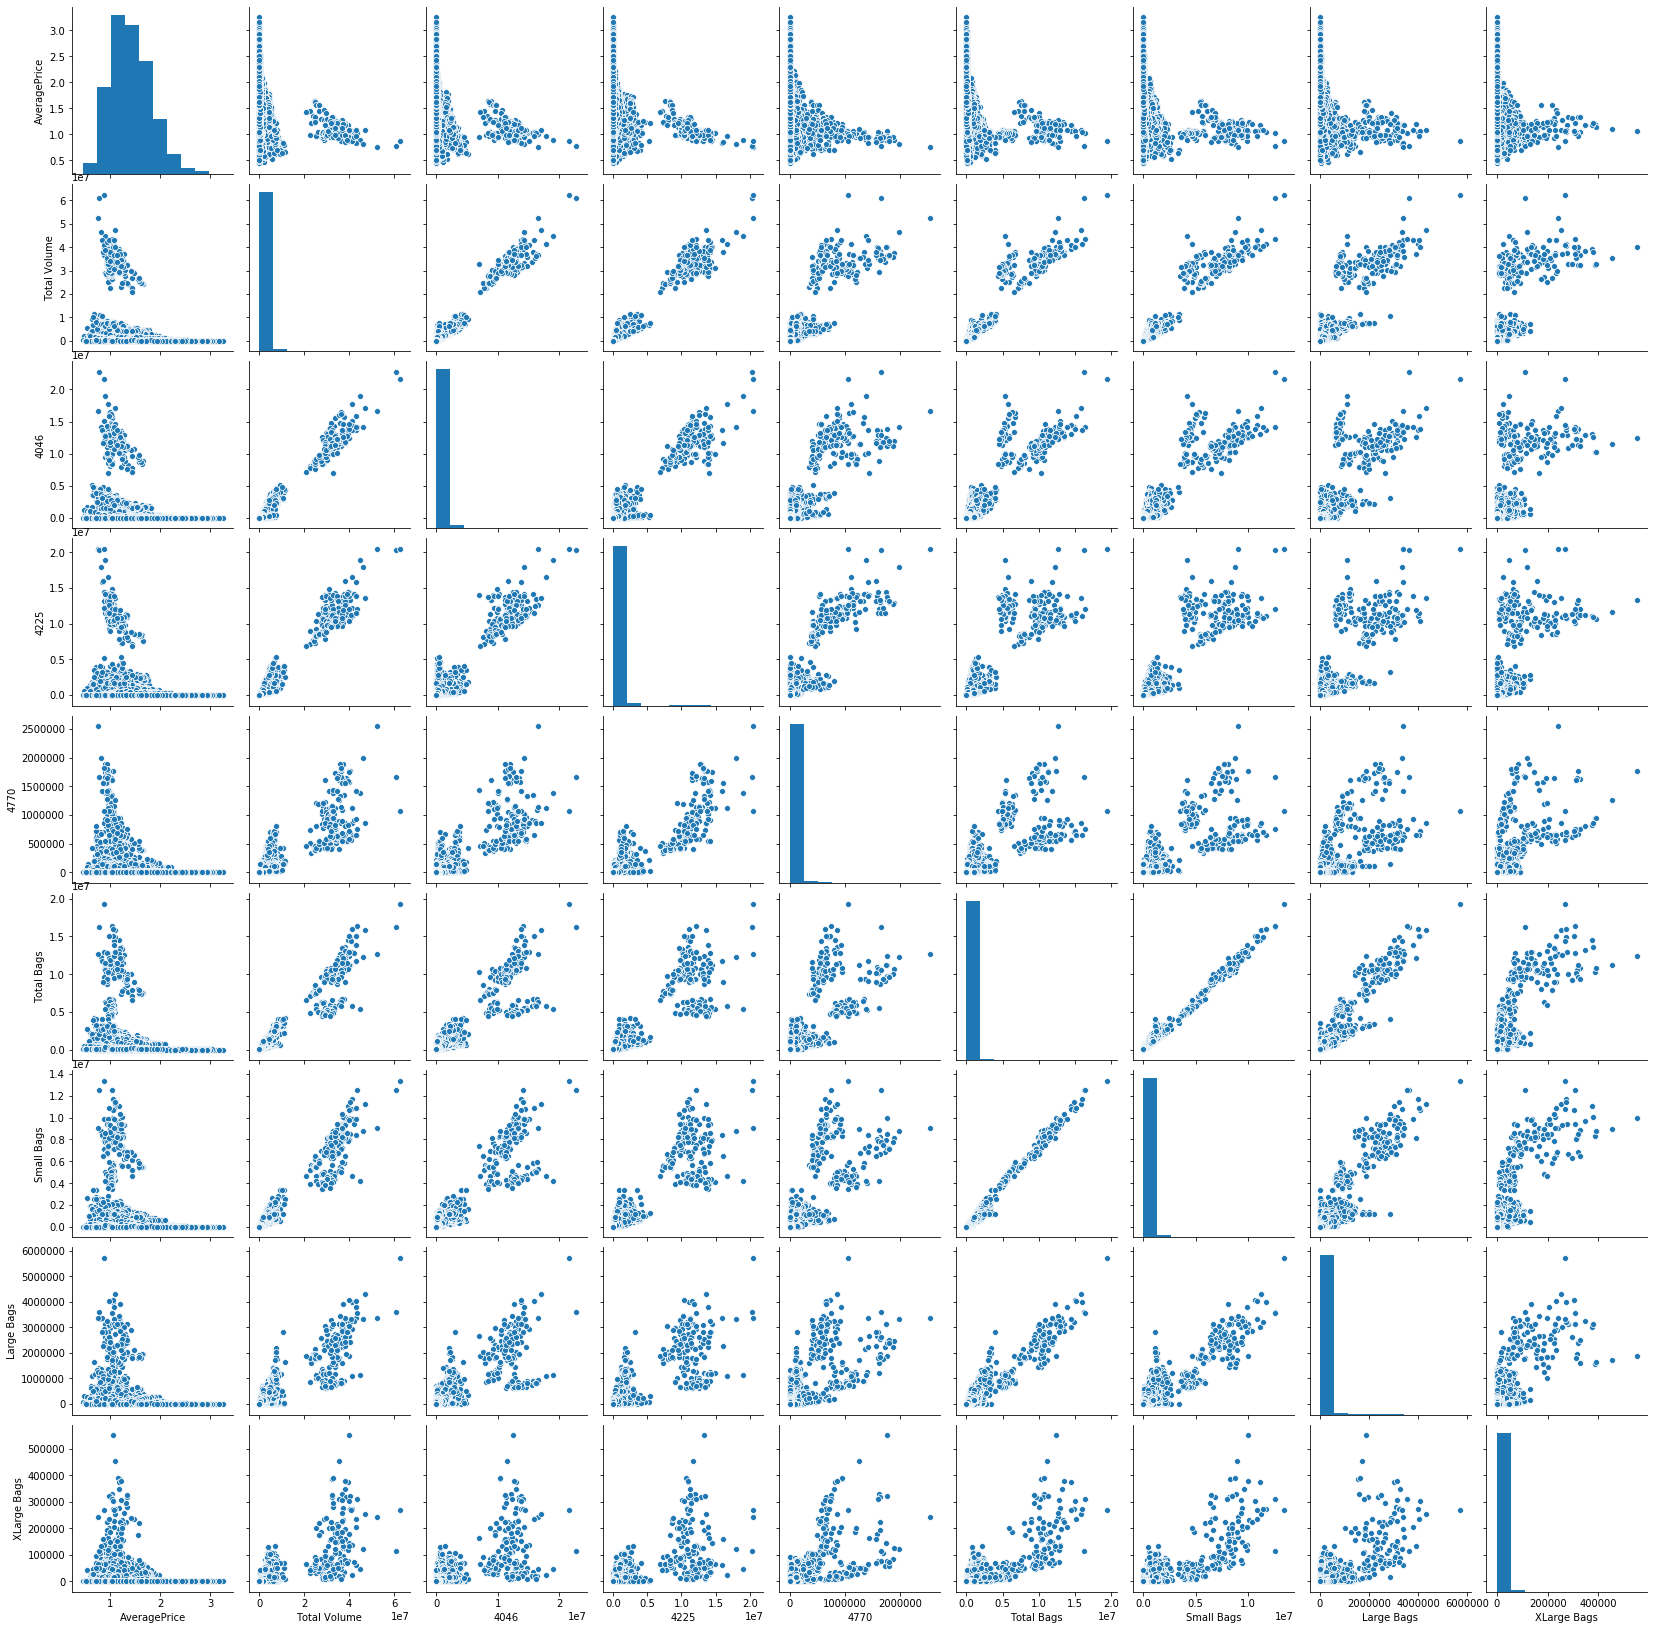

In [65]:
sns.pairplot(data[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])

In [66]:
data.groupby(['region','year']).agg({'AveragePrice':'mean','Total Volume':'sum'}).sort_values('AveragePrice', ascending = False)

AveragePrice  Total Volume
region              year                            
SanFrancisco        2017      1.965943  4.187150e+07
HartfordSpringfield 2017      1.888302  1.532260e+07
SanFrancisco        2016      1.881250  4.152963e+07
HartfordSpringfield 2016      1.851058  1.569795e+07
NewYork             2017      1.809906  7.485067e+07
...                                ...           ...
Houston             2015      1.048077  5.538747e+07
                    2018      1.042083  1.998252e+07
SouthCentral        2016      1.026923  3.040987e+08
DallasFtWorth       2016      0.996154  6.369525e+07
Houston             2016      0.991923  5.870479e+07

[216 rows x 2 columns]

In [67]:
data.groupby(['type','year']).agg({'AveragePrice':'mean','Total Volume':'sum'}).sort_values('AveragePrice', ascending = False)

AveragePrice  Total Volume
type         year                            
organic      2017      1.735521  1.681399e+08
             2015      1.673324  8.886943e+07
             2016      1.571684  1.306401e+08
             2018      1.567176  4.853227e+07
conventional 2017      1.294888  4.766166e+09
             2018      1.127886  1.334206e+09
             2016      1.105595  4.690250e+09
             2015      1.077963  4.296599e+09

In [68]:
data=data.rename(columns={'Total Volume':'Total_Volume',
                         'Total Bags':'Total_Bags',
                         'Small Bags':'Small_Bags',
                         'Large Bags': 'Large_Bags',
                         'XLarge Bags':'XLarge_Bags'})
data.head()

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [69]:
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['day_of_week'] = data['Date'].dt.dayofweek

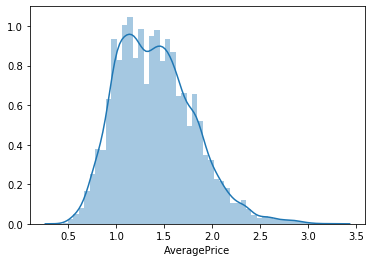

In [70]:
sns.distplot(data['AveragePrice'])

In [71]:
data_type_organic = data.query('type=="organic"')
data_type_conventional = data.query('type=="conventional"')

In [72]:
data_type_organic

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region,month,day,day_of_week
9126,2015-12-27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,2015,Albany,12,27,6
9127,2015-12-20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,2015,Albany,12,20,6
9128,2015-12-13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,2015,Albany,12,13,6
9129,2015-12-06,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,2015,Albany,12,6,6
9130,2015-11-29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,2015,Albany,11,29,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4,6
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28,6
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21,6
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14,6


In [73]:
data_type_organic.groupby(['day']).Total_Volume.sum()

day
1     14383981.77
2     10747093.07
3     15563053.79
4     19883184.35
5     16142357.51
6     10839269.24
7     14243376.69
8     14368839.19
9     10646988.71
10    16661905.32
11    20080161.22
12    15584366.35
13    10852100.78
14    14464260.85
15    13110850.85
16    10916824.00
17    15284632.94
18    20680425.78
19    16946258.09
20    10720415.90
21    12994460.81
22    14039565.08
23    10036865.47
24    16485600.88
25    18543127.98
26    17191490.91
27    10006706.26
28    13565461.17
29    11612698.82
30     9782402.61
31     9802955.70
Name: Total_Volume, dtype: float64

Text(0, 0.5, 'Сумма')

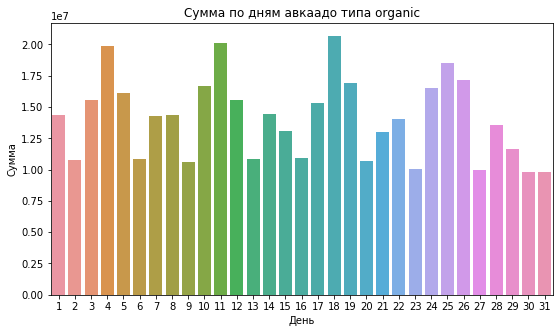

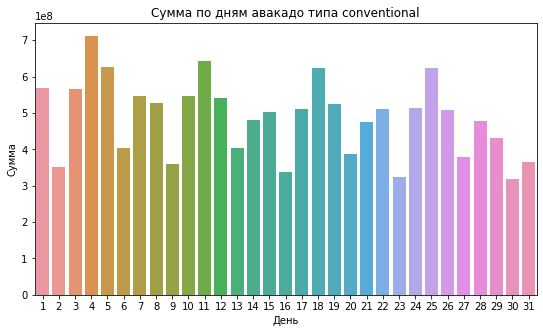

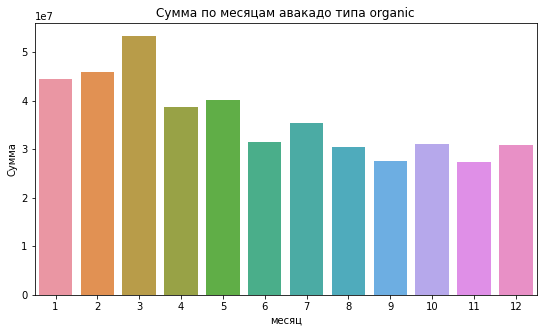

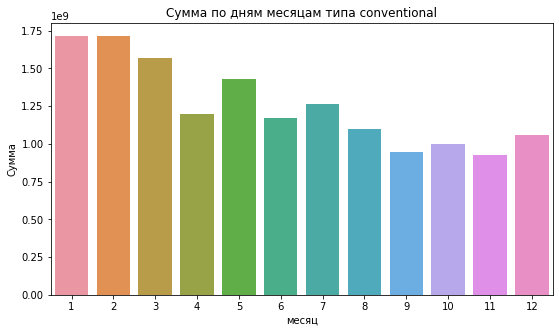

In [76]:
plt.figure(figsize=(9,5))
ax = sns.barplot(x=data_type_organic.groupby(['day']).Total_Volume.sum().index, 
                 y=data_type_organic.groupby(['day']).Total_Volume.sum().values, data=data_type_organic)
ax.set_title('Сумма по дням авкаадо типа organic')
ax.set_xlabel('День')
ax.set_ylabel('Сумма')

plt.figure(figsize=(9,5))
ax = sns.barplot(x=data_type_conventional.groupby(['day']).Total_Volume.sum().index, 
                 y=data_type_conventional.groupby(['day']).Total_Volume.sum().values, data=data_type_conventional)
ax.set_title('Сумма по дням авакадо типа conventional')
ax.set_xlabel('День')
ax.set_ylabel('Сумма')



plt.figure(figsize=(9,5))
ax = sns.barplot(x=data_type_organic.groupby(['month']).Total_Volume.sum().index, 
                 y=data_type_organic.groupby(['month']).Total_Volume.sum().values, data=data_type_organic)
ax.set_title('Сумма по месяцам авакадо типа organic')
ax.set_xlabel('месяц')
ax.set_ylabel('Сумма')

plt.figure(figsize=(9,5))
ax = sns.barplot(x=data_type_conventional.groupby(['month']).Total_Volume.sum().index, 
                 y=data_type_conventional.groupby(['month']).Total_Volume.sum().values, data=data_type_conventional)
ax.set_title('Сумма по дням месяцам типа conventional')
ax.set_xlabel('месяц')
ax.set_ylabel('Сумма')

Динамика у двух типов авакадо схожа, есть отличия небольшие по месяцам, но в целом динамика одинакова

Text(0, 0.5, 'Средняя цена')

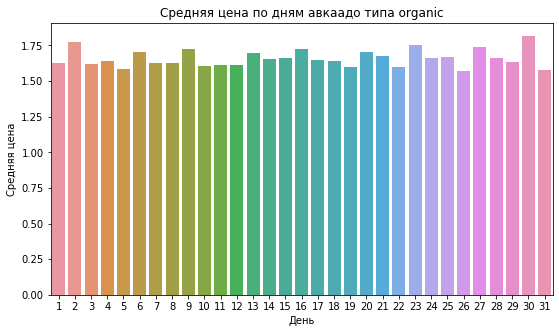

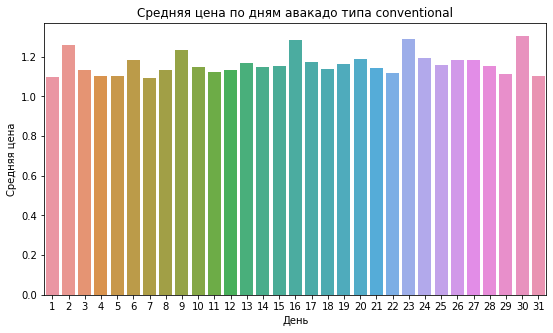

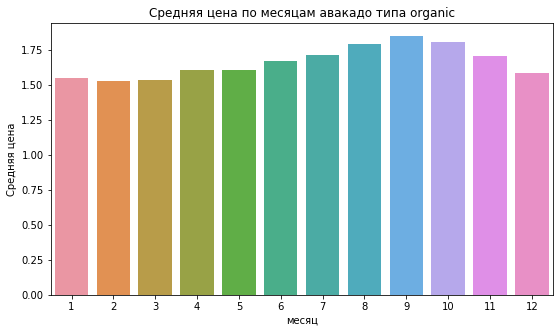

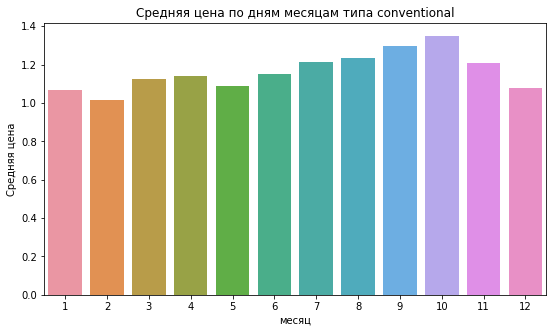

In [82]:
plt.figure(figsize=(9,5))
ax = sns.barplot(x=data_type_organic.groupby(['day']).AveragePrice.mean().index, 
                 y=data_type_organic.groupby(['day']).AveragePrice.mean().values, data=data_type_organic)
ax.set_title('Средняя цена по дням авкаадо типа organic')
ax.set_xlabel('День')
ax.set_ylabel('Средняя цена')

plt.figure(figsize=(9,5))
ax = sns.barplot(x=data_type_conventional.groupby(['day']).AveragePrice.mean().index, 
                 y=data_type_conventional.groupby(['day']).AveragePrice.mean().values, data=data_type_conventional)
ax.set_title('Средняя цена по дням авакадо типа conventional')
ax.set_xlabel('День')
ax.set_ylabel('Средняя цена')



plt.figure(figsize=(9,5))
ax = sns.barplot(x=data_type_organic.groupby(['month']).AveragePrice.mean().index, 
                 y=data_type_organic.groupby(['month']).AveragePrice.mean().values, data=data_type_organic)
ax.set_title('Средняя цена по месяцам авакадо типа organic')
ax.set_xlabel('месяц')
ax.set_ylabel('Средняя цена')

plt.figure(figsize=(9,5))
ax = sns.barplot(x=data_type_conventional.groupby(['month']).AveragePrice.mean().index, 
                 y=data_type_conventional.groupby(['month']).AveragePrice.mean().values, data=data_type_conventional)
ax.set_title('Средняя цена по дням месяцам типа conventional')
ax.set_xlabel('месяц')
ax.set_ylabel('Средняя цена')

Динамика цены также визуально выглядит идентично

In [147]:
import pylab as pl
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
import matplotlib.pyplot as pl
import seaborn as sns

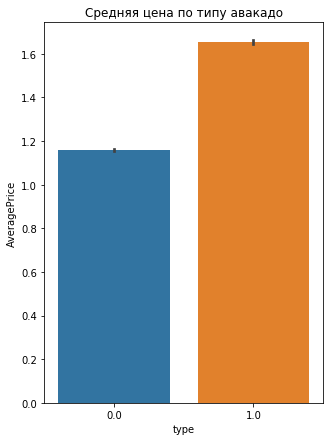

In [150]:
plt.figure(figsize=(5,7))
plt.title("Средняя цена по типу авакадо")
Av= sns.barplot(x="type",y="AveragePrice",data= data)

Далее попробуем обучить модель для трех задач:
    1. Предсказать тип авакадо;
    2. Предсказать цену авакадо;
    3. Предсказать Объем продаж.

In [95]:
data=data.drop(["month","day" ,"day_of_week" ], axis = 1)

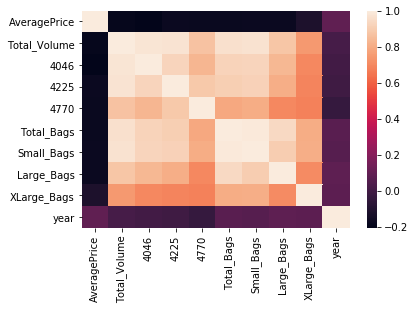

In [96]:
correlation = data.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)

In [98]:
abs(correlation['AveragePrice'])

AveragePrice    1.000000
Total_Volume    0.192752
4046            0.208317
4225            0.172928
4770            0.179446
Total_Bags      0.177088
Small_Bags      0.174730
Large_Bags      0.172940
XLarge_Bags     0.117592
year            0.093197
Name: AveragePrice, dtype: float64

In [99]:
abs(correlation['Total_Volume'])

AveragePrice    0.192752
Total_Volume    1.000000
4046            0.977863
4225            0.974181
4770            0.872202
Total_Bags      0.963047
Small_Bags      0.967238
Large_Bags      0.880640
XLarge_Bags     0.747157
year            0.017193
Name: Total_Volume, dtype: float64

In [101]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['type']= labelencoder.fit_transform(data['type']) 
data.head()

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany


In [103]:
data.type.value_counts()

0    9126
1    9123
Name: type, dtype: int64

In [104]:
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [105]:
data['region']= labelencoder.fit_transform(data['region']) 
data.head()

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [119]:
data["year"] = data["year"].astype("float")
data["region"] = data["region"].astype("float")
data["type"] = data["type"].astype("float")
data.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total_Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total_Bags             float64
Small_Bags             float64
Large_Bags             float64
XLarge_Bags            float64
type                   float64
year                   float64
region                 float64
dtype: object

In [120]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn import metrics
X = data.drop(['type','Date'], axis = 1)
y = data['type']
rfclassifier = RandomForestClassifier(n_estimators = 7, criterion = 'entropy')
rfclassifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=7,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [121]:
y_model=rfclassifier.predict(X_test)
accuracy_score (y_test, y_model)

0.9956164383561644

99% Точность на тестовой наборе, в данном направлении цель достигнута.

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
clf = tree.DecisionTreeClassifier()
parametrs= {'criterion': ['gini', 'entropy'], 'max_depth': range(1,17)}

In [123]:
clf_rf= RandomForestClassifier()
grid_search_cv_clf=GridSearchCV(clf_rf, parametrs, cv=5)

In [124]:
grid_search_cv_clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [125]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 16}

In [126]:
best_clf=grid_search_cv_clf.best_estimator_
best_clf.score(X_test,y_test)

0.9956164383561644

In [127]:
feature_importances = best_clf.feature_importances_

In [128]:
feature_importances_df=pd.DataFrame({'feature':list(X_train),
                                    'feature_importances':feature_importances})

In [129]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,feature,feature_importances
1,Total_Volume,0.214530
3,4225,0.140601
5,Total_Bags,0.136119
6,Small_Bags,0.104922
4,4770,0.098426
2,4046,0.083530
8,XLarge_Bags,0.075833
0,AveragePrice,0.061775
10,region,0.061737
7,Large_Bags,0.016724


In [130]:
from sklearn.linear_model import LinearRegression
X = data.drop(['AveragePrice','Date'], axis = 1)
y = data['AveragePrice']
X_train, X_test, y_train, y_test = holdout(X, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)

-74.05558898180527
[-5.94528983e-05  5.93623286e-05  5.95639190e-05  5.90191054e-05
 -7.96471595e-03  8.02418600e-03  8.02400382e-03  8.02589046e-03
  4.87740919e-01  3.73055982e-02  2.76828676e-04]


In [131]:
Lin_reg.score(X_test, y_test)

0.410779797191961

При предсказании цены точность 40%, это явно неудовлетворительный результат, попробуем другую модель

In [132]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)
y_test_pred = Lin_reg.predict(X_test)
df_Lin_reg = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df_Lin_reg

,Actual,Predicted
9181,1.48,1.603087
1013,1.05,1.126542
14625,1.27,1.630548
15234,2.15,1.679990
18247,1.93,1.729577
...,...,...
10657,2.07,1.613292
17490,1.41,1.682852
6634,1.76,1.195070
10947,1.69,1.611560


In [139]:
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(hidden_layer_sizes=(100,100,100,100), max_iter=2000, random_state=42)
MLP.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=2000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [140]:
MLP.score(X_test, y_test)

0.9999949965565471

точность 99% нас устраивает

In [153]:
y_test_pred = MLP.predict(X_test)
df_MLP = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df_MLP

,Actual,Predicted
9181,4400.25,4.232538e+03
1013,190716.43,1.928850e+05
14625,1045450.41,1.028965e+06
15234,9883.59,9.364879e+03
18247,16205.22,1.608249e+04
...,...,...
10657,47878.48,4.748378e+04
17490,1060775.98,1.059172e+06
6634,120662.74,1.174235e+05
10947,29471.57,2.848303e+04


In [133]:
X = data.drop(['Total_Volume','Date'], axis = 1)
y = data['Total_Volume']
X_train, X_test, y_train, y_test = holdout(X, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)

-5539.034656087519
[-1.79466242  0.99999561  0.99999773  1.00001247  0.89573318  0.1042835
  0.10425863  0.10403744  5.45456259  2.7477374   0.03869754]


In [134]:
Lin_reg.score(X_test, y_test)

0.9999999999638006

In [135]:
Lin_reg = LinearRegression()
Lin_reg.fit(X_train, y_train)
y_test_pred = Lin_reg.predict(X_test)
df_Lin_reg = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df_Lin_reg

,Actual,Predicted
9181,4400.25,4.400726e+03
1013,190716.43,1.907129e+05
14625,1045450.41,1.045456e+06
15234,9883.59,9.888685e+03
18247,16205.22,1.621534e+04
...,...,...
10657,47878.48,4.787933e+04
17490,1060775.98,1.060788e+06
6634,120662.74,1.206635e+05
10947,29471.57,2.947304e+04


В данном случае точность также 99%, задачи поставленные по обучению моделей, будем считать выполненными